In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import RobustScaler# para regularizar datos a entrenar

from sklearn.linear_model import LinearRegression# para realziar la predicion por el metodo lenea de regresion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # modelo de prediccion basado en conseguir una liena que representa al cojunto de puntos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel# SE USA PARA LA SELECCION DE COEFICIENTES PARA SELECCION DE CARACTERISTICAS DE LOS OBJETOS QUE REPRESENTAN
from sklearn.linear_model import ElasticNet# modelo predicitivo que mezcla lasso L1 y Ridge L2 en su prediciones
from sklearn.ensemble import GradientBoostingRegressor # otro modelo de prediccion construye árboles de decisión en serie, cada uno corrigiendo los errores del anterior. 
#es conocido por su capacidad para manejar conjuntos de datos complejos y mejorar el rendimiento mediante la combinación de múltiples árboles de decisión.
from sklearn.ensemble import RandomForestRegressor #Un modelo de conjunto que utiliza múltiples árboles de decisión para hacer predicciones.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV# para ajustar hiperparametros en la predicion por si no va bien con la cuadricula. 
#cuadrícula (Grid Search) y RandomizedSearchCV son técnicas utilizadas para encontrar los mejores hiperparámetros para un modelo
from scipy.stats import randint

In [2]:
ciber_seguridad=pd.read_csv(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASET ORIGINALES\salarios_cyber.csv")

In [3]:
ciber_seguridad

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [4]:
palabras_traducidas = {
    "work_year": "año de trabajo",
    "experience_level": "nivel de experiencia",
    "employment_type": "tipo de empleo",
    "job_title": "puesto de trabajo",
    "salary": "salario",
    "salary_currency": "moneda del salario",
    "salary_in_usd": "salario en USD",
    "employee_residence": "residencia del empleado",
    "remote_ratio": "proporción de trabajo remoto",
    "company_location": "ubicación de la empresa",
    "company_size": "tamaño de la empresa"}

In [5]:
# HAGO UN NUEVO DF CON LAS COLUMNS TRADUCIDAS
ciber_seguridad.rename(columns=palabras_traducidas, inplace=True)
ciber_seguridad.head(2)

,año de trabajo,nivel de experiencia,tipo de empleo,puesto de trabajo,salario,moneda del salario,salario en USD,residencia del empleado,proporción de trabajo remoto,ubicación de la empresa,tamaño de la empresa
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M


In [6]:
def empleo2(tipo):
    if tipo == "FT":
        return "Un empleado a tiempo completo trabaja las horas estándar o requeridas por la empresa, generalmente al menos 40 horas a la semana"
    elif tipo == "PT":
        return "Un empleado a tiempo parcial trabaja un número reducido de horas en comparación con un empleado a tiempo completo. Las horas pueden variar, pero generalmente son menos de 30 horas a la semana."
    elif tipo == "CT":
        return "Un empleado contratado tiene un acuerdo laboral por un período específico o para un proyecto particular. La relación laboral puede finalizar una vez que se complete el contrato."
    elif tipo == "FL":
        return "Un trabajador independiente trabaja de manera autónoma y generalmente es contratado por proyectos específicos. No está vinculado a una empresa de manera permanente"
    
# asigno categoria al df_ciber_salrio
ciber_seguridad['significado de empleo'] = ciber_seguridad['tipo de empleo'].apply(empleo2)

In [7]:
# prosigo con la columna nivel de experiecnia
def certificacion (tipo): 
    if tipo == "EN":
        return "Entry-Level (Nivel de Entrada"
    elif tipo =="SE":
        return "Security Expert (Experto en Seguridad)"
    elif tipo =="MI":
        return "Mid-Level (Nivel Intermedio)"
    elif tipo =="EX":
        return "High Experienced"

 #asigno categoria al df_ciber_salrio
ciber_seguridad['tipo de experiencia'] = ciber_seguridad['nivel de experiencia'].apply(certificacion)

In [8]:
#prosigo con la columna nivel de experiecnia
def certificacion2 (tipo): 
    if tipo == "EN":
        return "Indica un nivel básico de habilidades y experiencia, generalmente adecuado para personas que están comenzando en el campo."
    elif tipo =="SE":
        return "Indica un nivel de experiencia más avanzado en el ámbito de la seguridad informática. Los profesionales con esta designación suelen tener habilidades especializadas en seguridad."
    elif tipo =="MI":
        return "Indica un nivel intermedio de habilidades y experiencia. Las personas en este nivel han adquirido experiencia adicional después del nivel de entrada."
    elif tipo =="EX":
        return "Indica un nivel de experiencia muy expecializado en un ambito muy concreto dentro de la ciberseguridad"

 #asigno categoria al df_ciber_salrio
ciber_seguridad['aptitudes por experiencia'] = ciber_seguridad['nivel de experiencia'].apply(certificacion2)

In [9]:
ciber_seguridad.head(2)

,año de trabajo,nivel de experiencia,tipo de empleo,puesto de trabajo,salario,moneda del salario,salario en USD,residencia del empleado,proporción de trabajo remoto,ubicación de la empresa,tamaño de la empresa,significado de empleo,tipo de experiencia,aptitudes por experiencia
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S,Un empleado a tiempo completo trabaja las hora...,Entry-Level (Nivel de Entrada,Indica un nivel básico de habilidades y experi...
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M,Un empleado a tiempo completo trabaja las hora...,Mid-Level (Nivel Intermedio),Indica un nivel intermedio de habilidades y ex...


In [3]:
def obtener_estadisticas(df):

    resultado = pd.DataFrame()
    for col in df.columns:
        datos = {}
        datos['porcentaje_cardinalidad'] = round(df[col].nunique() / len(df) * 100, 2)
        datos['Tipo'] = df[col].dtype
        if pd.api.types.is_numeric_dtype(df[col]):
            datos['media'] = round(df[col].mean(), 2)
            datos['moda'] = "No"
            datos['std'] = round(df[col].std(), 2)
            datos['var'] = round(df[col].var(), 2)
            datos['Q1'] = round(df[col].quantile(0.25), 2)
            datos['mediana'] = round(df[col].median(), 2)
            datos['Q3'] = round(df[col].quantile(0.75), 2)
            datos['Categoria'] = 'numerica continua' if df[col].nunique() > 10 else 'numerica discreta'
        else:
            datos['media'] = "No"
            datos['moda'] = df[col].mode().iloc[0] if not df[col].mode().empty else "No"
            datos['std'] = "No"
            datos['var'] = "No"
            datos['Q1'] = "No"
            datos['mediana'] = "No"
            datos['Q3'] = "No"
            datos['Categoria'] = 'categorica ordinal' if df[col].nunique() > 2 else 'categorica nominal'
        datos['porcentaje_NaN'] = round(df[col].isna().mean() * 100, 2)
        resultado[col] = pd.Series(datos)
    return resultado.transpose()

In [11]:
obtener_estadisticas(ciber_seguridad)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
año de trabajo,0.24,int64,2021.32,No,0.72,0.51,2021.0,2021.0,2022.0,numerica discreta,0.0
nivel de experiencia,0.32,object,No,SE,No,No,No,No,No,categorica ordinal,0.0
tipo de empleo,0.32,object,No,FT,No,No,No,No,No,categorica ordinal,0.0
puesto de trabajo,6.98,object,No,Security Engineer,No,No,No,No,No,categorica ordinal,0.0
salario,30.79,int64,560852.49,No,14159440.25,200489748056769.25,79754.5,120000.0,160080.0,numerica continua,0.0
moneda del salario,1.68,object,No,USD,No,No,No,No,No,categorica ordinal,0.0
salario en USD,46.43,int64,120278.22,No,70291.39,4940880202.93,74594.5,110000.0,150000.0,numerica continua,0.0
residencia del empleado,4.65,object,No,US,No,No,No,No,No,categorica ordinal,0.0
proporción de trabajo remoto,0.24,int64,71.49,No,39.35,1548.17,50.0,100.0,100.0,numerica discreta,0.0
ubicación de la empresa,4.41,object,No,US,No,No,No,No,No,categorica ordinal,0.0


In [12]:
ciber_seguridad.head()

,año de trabajo,nivel de experiencia,tipo de empleo,puesto de trabajo,salario,moneda del salario,salario en USD,residencia del empleado,proporción de trabajo remoto,ubicación de la empresa,tamaño de la empresa,significado de empleo,tipo de experiencia,aptitudes por experiencia
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S,Un empleado a tiempo completo trabaja las hora...,Entry-Level (Nivel de Entrada,Indica un nivel básico de habilidades y experi...
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M,Un empleado a tiempo completo trabaja las hora...,Mid-Level (Nivel Intermedio),Indica un nivel intermedio de habilidades y ex...
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M,Un empleado a tiempo completo trabaja las hora...,Mid-Level (Nivel Intermedio),Indica un nivel intermedio de habilidades y ex...
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L,Un empleado a tiempo completo trabaja las hora...,Mid-Level (Nivel Intermedio),Indica un nivel intermedio de habilidades y ex...
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S,Un empleado contratado tiene un acuerdo labora...,Entry-Level (Nivel de Entrada,Indica un nivel básico de habilidades y experi...


In [35]:
puestos_trabajo = {
    "Cyber Program Manager": "Gestor de Programa de Ciberseguridad",
    "Security Analyst": "Analista de Seguridad",
    "IT Security Analyst": "Analista de Seguridad Informática",
    "Cyber Security Analyst": "Analista de Seguridad Cibernética",
    "Application Security Architect": "Arquitecto de Seguridad de Aplicaciones",
    "Security Researcher": "Investigador de Seguridad",
    "Information Security Compliance Analyst": "Analista de Cumplimiento de Seguridad de la Información",
    "Information Security Compliance Manager": "Gestor de Cumplimiento de Seguridad de la Información",
    "Security Specialist": "Especialista de Seguridad",
    "Application Security Specialist": "Especialista de Seguridad de Aplicaciones",
    "Cyber Security Consultant": "Consultor de Seguridad Cibernética",
    "Head of Information Security": "Jefe de Seguridad de la Información",
    "Security Incident Response Engineer": "Ingeniero de Respuesta a Incidentes de Seguridad",
    "Ethical Hacker": "Hacker Ético",
    "Chief Information Security Officer": "Director de Seguridad de la Información",
    "DevSecOps Engineer": "Ingeniero de DevSecOps",
    "IT Security Manager": "Director de Seguridad Informática",
    "Application Security Engineer": "Ingeniero de Seguridad de Aplicaciones",
    "Vulnerability Analyst": "Analista de Vulnerabilidades",
    "Cyber Security Engineer": "Ingeniero de Seguridad Cibernética",
    "Information Security Analyst": "Analista de Seguridad de la Información",
    "Principal Application Security Engineer": "Ingeniero Principal de Seguridad de Aplicaciones",
    "Cyber Security Architect": "Arquitecto de Seguridad Cibernética",
    "Information Security Manager": "Gestor de Seguridad de la Información",
    "SOC Analyst": "Analista de Centro de Operaciones de Seguridad",
    "Penetration Tester": "Penetrador",
    "Cyber Threat Intelligence Analyst": "Analista de Inteligencia de Amenazas Cibernéticas",
    "Cloud Security Engineer": "Ingeniero de Seguridad en la Nube",
    "Information Security Officer": "Oficial de Seguridad de la Información",
    "Security Consultant": "Consultor de Seguridad",
    "Information Security Specialist": "Especialista de Seguridad de la Información",
    "Director of Information Security": "Director de Seguridad de la Información",
    "Security Engineer": "Ingeniero de Seguridad",
    "Information Security Compliance Lead": "Responsable de Cumplimiento de Seguridad de la Información",
    "Threat Hunter": "Cazador de Amenazas",
    "Threat Intelligence Analyst": "Analista de Inteligencia de Amenazas",
    "IT Security Engineer": "Ingeniero de Seguridad Informática",
    "Cloud Security Engineering Manager": "Gerente de Ingeniería de Seguridad en la Nube",
    "Application Security Analyst": "Analista de Seguridad de Aplicaciones",
    "Data Security Analyst": "Analista de Seguridad de Datos",
    "Detection Engineer": "Ingeniero de Detección",
    "Principal Security Engineer": "Ingeniero Principal de Seguridad",
    "Information Systems Security Engineer": "Ingeniero de Seguridad de Sistemas Informáticos",
    "Staff Application Security Engineer": "Ingeniero de Seguridad de Aplicaciones de Personal",
    "Principal Cloud Security Engineer": "Ingeniero Principal de Seguridad en la Nube",
    "Lead Information Security Engineer": "Ingeniero Principal de Seguridad de la Información",
    "Corporate Infrastructure Security Engineer": "Ingeniero de Seguridad de Infraestructura Corporativa",
    "Security Officer 3": "Oficial de Seguridad 3",
    "Lead Application Security Engineer": "Ingeniero Principal de Seguridad de Aplicaciones",
    "Concierge Security Engineer": "Ingeniero de Seguridad Concierge"
}


In [37]:
ciber_seguridad["puesto de trabajo"] = ciber_seguridad["puesto de trabajo"].replace(puestos_trabajo)



In [24]:
ciber_seguridad["ubicación de la empresa"].unique()

array(['US', 'BR', 'BW', 'GB', 'SG', 'NL', 'IN', 'DE', 'AE', 'CA', 'CH',
       'DK', 'CL', 'ES', 'AU', 'FR', 'IT', 'JP', 'GR', 'AZ', 'RO', 'DZ',
       'AQ', 'AX', 'SI', 'HR', 'SE', 'HU', 'ET', 'MX', 'IL', 'IE', 'PK',
       'NO', 'PL', 'PT', 'RU', 'CZ', 'ID', 'EE', 'KE', 'RS', 'AR', 'NZ',
       'BE', 'ZA', 'AT', 'UM', 'LU', 'EG', 'TW', 'VN', 'SA', 'AF', 'TR'],
      dtype=object)

In [52]:
ciber_seguridad["puesto de trabajo"].unique()

array(['Gestor de Programa de Ciberseguridad', 'Analista de Seguridad',
       'Analista de Seguridad Informática',
       'Analista de Seguridad Cibernética',
       'Arquitecto de Seguridad de Aplicaciones',
       'Investigador de Seguridad',
       'Analista de Cumplimiento de Seguridad de la Información',
       'Gestor de Cumplimiento de Seguridad de la Información',
       'Especialista de Seguridad',
       'Especialista de Seguridad de Aplicaciones',
       'Consultor de Seguridad Cibernética',
       'Jefe de Seguridad de la Información',
       'Ingeniero de Respuesta a Incidentes de Seguridad', 'Hacker Ético',
       'Director de Seguridad de la Información',
       'Ingeniero de DevSecOps', 'Director de Seguridad Informática',
       'Ingeniero de Seguridad de Aplicaciones',
       'Analista de Vulnerabilidades',
       'Ingeniero de Seguridad Cibernética',
       'Analista de Seguridad de la Información',
       'Ingeniero Principal de Seguridad de Aplicaciones',
       '

In [53]:
ciber_seguridad["puesto de trabajo"].mode()

0    Ingeniero de Seguridad
Name: puesto de trabajo, dtype: object

In [55]:
ciber_seguridad.head()

,año de trabajo,nivel de experiencia,tipo de empleo,puesto de trabajo,salario,moneda del salario,salario en USD,residencia del empleado,proporción de trabajo remoto,ubicación de la empresa,tamaño de la empresa,significado de empleo,tipo de experiencia,aptitudes por experiencia
0,2022,EN,FT,Gestor de Programa de Ciberseguridad,63000,USD,63000,US,50,US,S,Un empleado a tiempo completo trabaja las hora...,Entry-Level (Nivel de Entrada,Indica un nivel básico de habilidades y experi...
1,2022,MI,FT,Analista de Seguridad,95000,USD,95000,US,0,US,M,Un empleado a tiempo completo trabaja las hora...,Mid-Level (Nivel Intermedio),Indica un nivel intermedio de habilidades y ex...
2,2022,MI,FT,Analista de Seguridad,70000,USD,70000,US,0,US,M,Un empleado a tiempo completo trabaja las hora...,Mid-Level (Nivel Intermedio),Indica un nivel intermedio de habilidades y ex...
3,2022,MI,FT,Analista de Seguridad Informática,250000,BRL,48853,BR,50,BR,L,Un empleado a tiempo completo trabaja las hora...,Mid-Level (Nivel Intermedio),Indica un nivel intermedio de habilidades y ex...
4,2022,EN,CT,Analista de Seguridad Cibernética,120000,USD,120000,BW,100,BW,S,Un empleado contratado tiene un acuerdo labora...,Entry-Level (Nivel de Entrada,Indica un nivel básico de habilidades y experi...


In [59]:
ciber_seguridad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   año de trabajo                1247 non-null   int64 
 1   nivel de experiencia          1247 non-null   object
 2   tipo de empleo                1247 non-null   object
 3   puesto de trabajo             1247 non-null   object
 4   salario                       1247 non-null   int64 
 5   moneda del salario            1247 non-null   object
 6   salario en USD                1247 non-null   int64 
 7   residencia del empleado       1247 non-null   object
 8   proporción de trabajo remoto  1247 non-null   int64 
 9   ubicación de la empresa       1247 non-null   object
 10  tamaño de la empresa          1247 non-null   object
 11  significado de empleo         1247 non-null   object
 12  tipo de experiencia           1247 non-null   object
 13  aptitudes por expe

In [57]:
ciber_seguridad.to_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASET ORIGINALES\salarios CYBER 2023\salarios_cyber.xlsx", index=False)

In [3]:

def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

In [4]:
plot_combined_graphs(ciber_seguridad, ["salario", "año de trabajo"], whisker_width= 3) # 3 veces la longitud habitual (que es 1.5*IQR)

# en el plotbox el valor maximo (mediana+1,5 * IQR), el 1.5 es estimado y podemos apmpliarlo lo suyo es empezar 3 veces mas e ir bajando a nuestras necesidades.
# en este caso es mejor dejarlo en 1.5 y vemos que hay outliers despues del maximo, para ello binnearemos(convertir variables continuas en variables categorigas discretas
# a traves de ka creacion de bins)

NameError: name 'ciber_seguridad' is not defined

In [54]:
# Filtrar los puestos que incluyen "Data Science"
df_data_science=ciber_seguridad.loc[(ciber_seguridad['puesto de trabajo'].str.contains('Seguridad')) & (ciber_seguridad['ubicación de la empresa'] == 'ES')]

# Agrupar por experiencia, salario, moneda del salario y ubicación de la empresa
grouped_data = df_data_science.groupby(["puesto de trabajo",'nivel de experiencia', 'salario', 'moneda del salario', 'ubicación de la empresa', "proporción de trabajo remoto"]).size().reset_index(name='count')

# Ordenar el DataFrame por valores mayores de la columna "proporción de trabajo remoto"
grouped_data_sorted = grouped_data.sort_values(by="proporción de trabajo remoto", ascending=False)

grouped_data_sorted

,puesto de trabajo,nivel de experiencia,salario,moneda del salario,ubicación de la empresa,proporción de trabajo remoto,count
0,Gerente de Ingeniería de Seguridad en la Nube,SE,55000,EUR,ES,100,1
2,Ingeniero de Seguridad Cibernética,SE,38000,EUR,ES,100,1
1,Gestor de Seguridad de la Información,SE,40000,EUR,ES,0,1


In [58]:
ciber_seguridad.loc[ciber_seguridad['ubicación de la empresa'] == 'ES'].groupby(['puesto de trabajo', 'salario']).describe()

año de trabajo          \
                                                               count    mean   
puesto de trabajo                             salario                          
Cyber Security Specialist                     45000              1.0  2020.0   
Gerente de Ingeniería de Seguridad en la Nube 55000              1.0  2021.0   
Gestor de Seguridad de la Información         40000              1.0  2021.0   
Information Security Architect                55000              1.0  2020.0   
Ingeniero de Detección                        40000              1.0  2022.0   
Ingeniero de Seguridad Cibernética            38000              1.0  2022.0   
Lead Security Engineer                        85000              1.0  2021.0   
Penetrador                                    10000              1.0  2022.0   
                                              33000              1.0  2021.0   
Penetration Testing Engineer                  62000              1.0  2020.0   
Product Security Engineer                     85000              1.0  2021.0   

                                                                           \
                                                      std     min     25%   
puesto de trabajo                             salario                       
Cyber Security Specialist                     45000   NaN  2020.0  2020.0   
Gerente de Ingeniería de Seguridad en la Nube 55000   NaN  2021.0  2021.0   
Gestor de Seguridad de la Información         40000   NaN  2021.0  2021.0   
Information Security Architect                55000   NaN  2020.0  2020.0   
Ingeniero de Detección                        40000   NaN  2022.0  2022.0   
Ingeniero de Seguridad Cibernética            38000   NaN  2022.0  2022.0   
Lead Security Engineer                        85000   NaN  2021.0  2021.0   
Penetrador                                    10000   NaN  2022.0  2022.0   
                                              33000   NaN  2021.0  2021.0   
Penetration Testing Engineer                  62000   NaN  2020.0  2020.0   
Product Security Engineer                     85000   NaN  2021.0  2021.0   

                                                                               \
                                                          50%     75%     max   
puesto de trabajo                             salario                           
Cyber Security Specialist                     45000    2020.0  2020.0  2020.0   
Gerente de Ingeniería de Seguridad en la Nube 55000    2021.0  2021.0  2021.0   
Gestor de Seguridad de la Información         40000    2021.0  2021.0  2021.0   
Information Security Architect                55000    2020.0  2020.0  2020.0   
Ingeniero de Detección                        40000    2022.0  2022.0  2022.0   
Ingeniero de Seguridad Cibernética            38000    2022.0  2022.0  2022.0   
Lead Security Engineer                        85000    2021.0  2021.0  2021.0   
Penetrador                                    10000    2022.0  2022.0  2022.0   
                                              33000    2021.0  2021.0  2021.0   
Penetration Testing Engineer                  62000    2020.0  2020.0  2020.0   
Product Security Engineer                     85000    2021.0  2021.0  2021.0   

                                                      salario en USD  \
                                                               count   
puesto de trabajo                             salario                  
Cyber Security Specialist                     45000              1.0   
Gerente de Ingeniería de Seguridad en la Nube 55000              1.0   
Gestor de Seguridad de la Información         40000              1.0   
Information Security Architect                55000              1.0   
Ingeniero de Detección                        40000              1.0   
Ingeniero de Seguridad Cibernética            38000              1.0   
Lead Security Engineer                        85000              1.0   

In [4]:
ciber_seguridad=pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASET ORIGINALES\salarios CYBER 2023\salarios_cyber.xlsx")

In [5]:
ciber_seguridad.head(1)

,año de trabajo,nivel de experiencia,tipo de empleo,puesto de trabajo,salario,moneda del salario,salario en USD,residencia del empleado,proporción de trabajo remoto,ubicación de la empresa,tamaño de la empresa,significado de empleo,tipo de experiencia,aptitudes por experiencia
0,2022,EN,FT,Gestor de Programa de Ciberseguridad,63000,USD,63000,US,50,US,S,Un empleado a tiempo completo trabaja las hora...,Entry-Level (Nivel de Entrada,Indica un nivel básico de habilidades y experi...


# LA REGEGRESION LINEAL


In [6]:
obtener_estadisticas(ciber_seguridad)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
año de trabajo,0.24,int64,2021.32,No,0.72,0.51,2021.0,2021.0,2022.0,numerica discreta,0.0
nivel de experiencia,0.32,object,No,SE,No,No,No,No,No,categorica ordinal,0.0
tipo de empleo,0.32,object,No,FT,No,No,No,No,No,categorica ordinal,0.0
puesto de trabajo,6.82,object,No,Ingeniero de Seguridad,No,No,No,No,No,categorica ordinal,0.0
salario,30.79,int64,560852.49,No,14159440.25,200489748056769.25,79754.5,120000.0,160080.0,numerica continua,0.0
moneda del salario,1.68,object,No,USD,No,No,No,No,No,categorica ordinal,0.0
salario en USD,46.43,int64,120278.22,No,70291.39,4940880202.93,74594.5,110000.0,150000.0,numerica continua,0.0
residencia del empleado,4.65,object,No,US,No,No,No,No,No,categorica ordinal,0.0
proporción de trabajo remoto,0.24,int64,71.49,No,39.35,1548.17,50.0,100.0,100.0,numerica discreta,0.0
ubicación de la empresa,4.41,object,No,US,No,No,No,No,No,categorica ordinal,0.0


In [7]:
# COMPROBAR LOS RESGISTROS numero y si hay nulos
print(ciber_seguridad.shape)
print(ciber_seguridad.isna().sum())

(1247, 14)
año de trabajo                  0
nivel de experiencia            0
tipo de empleo                  0
puesto de trabajo               0
salario                         0
moneda del salario              0
salario en USD                  0
residencia del empleado         0
proporción de trabajo remoto    0
ubicación de la empresa         0
tamaño de la empresa            0
significado de empleo           0
tipo de experiencia             0
aptitudes por experiencia       0
dtype: int64


In [8]:
df_lr= ciber_seguridad.copy()

In [9]:
# cramos los vectores de las variables
X= df_lr[["año de trabajo", "nivel de experiencia", "puesto de trabajo","proporción de trabajo remoto"]]

In [10]:
#reamos el vector para la variable independiente
Y = df_lr["salario"]



In [11]:
# Codificar las variables categóricas
X = pd.get_dummies(X)

In [12]:
# Transformar salarios en una matriz de dos dimensiones
salarios_matriz = Y.to_numpy().reshape(-1, 1)
Y= salarios_matriz

In [13]:
# Normalizar los datos usando StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)
scaler.fit_transform(Y)

array([[-0.03517457],
       [-0.03291369],
       [-0.03468   ],
       ...,
       [-0.03072346],
       [-0.03665827],
       [-0.03494071]])

In [14]:
Lasso = Lasso(alpha=0.1)
Lasso.fit(X, Y)

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.793e+16, tolerance: 2.498e+13
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [15]:
y_pred = Lasso.predict(X)
mse = np.mean((y_pred - Y) ** 2)
print("MSE:", mse)

MSE: 229008867252964.53


In [16]:
ridge = Ridge(alpha=0.1)
ridge.fit(X, Y)


Ridge(alpha=0.1)

In [17]:
y_pred = ridge.predict(X)
mse = np.mean((y_pred - Y) ** 2)
print("MSE:", mse)

MSE: 171654809375889.0


In [18]:
#ENtrenamos el modelo de regresion lineal
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [35]:
#Obtener los coeficientes de la regresión:
print(model.coef_)

[[ 5.71158036e+05 -6.86648581e+02 -1.39944096e+17 -1.39944096e+17
  -1.39944096e+17 -1.39944096e+17 -3.70644739e+16 -3.70644739e+16
  -3.70644739e+16 -3.70644739e+16 -3.70644739e+16 -3.70644739e+16
  -3.70644739e+16 -3.70644739e+16 -3.70644739e+16 -3.70644739e+16
  -3.70644739e+16 -3.70644739e+16 -3.70644739e+16 -3.70644739e+16
  -3.70644739e+16 -3.70644739e+16 -3.70644739e+16 -3.70644739e+16
  -3.70644739e+16 -3.70644739e+16 -3.70644739e+16 -3.70644739e+16
  -3.70644739e+16 -3.70644739e+16 -3.70644739e+16 -3.70644739e+16
  -3.70644739e+16 -3.70644739e+16 -3.70644739e+16 -3.70644739e+16
  -3.70644739e+16 -3.70644739e+16 -3.70644739e+16 -3.70644739e+16
  -3.70644739e+16 -3.70644739e+16 -3.70644739e+16 -3.70644739e+16
  -3.70644739e+16 -3.70644739e+16 -3.70644739e+16 -3.70644739e+16
  -3.70644739e+16 -3.70644739e+16 -3.70644739e+16 -3.70644739e+16
  -3.70644739e+16 -3.70644739e+16 -3.70644739e+16 -3.70644739e+16
  -3.70644739e+16 -3.70644739e+16 -3.70644739e+16 -3.70644739e+16
  -3.70644

In [34]:
#Obtener la ecuación de la regresión:

print(model.intercept_)

[1.77008568e+17]


PINTAMOS CON LINEARGRESSION

In [36]:
coefs = model.coef_

# Rango de valores de la variable independiente
x = np.arange(0, 50)

# Valores de la línea de regresión
y = np.polyval(coefs, X)

# Pintar la línea de regresión
plt.plot(X, Y, color='red')

# Etiquetas de los ejes
plt.xlabel("Años de trabajo")
plt.ylabel("Salario en USD")

# Mostrar la figura
plt.show()


ValueError: operands could not be broadcast together with shapes (1247,10) (91,) 

REGULARIZACION CON LASSO Y L1(iene la propiedad de establecer algunos coeficientes a cero, lo que efectivamente selecciona características importantes y realiza cierta "eliminación de características".)

In [31]:

# Asegúrate de tener las columnas correctas en X y Y
columnas_numericas = ['año de trabajo', 'proporción de trabajo remoto']
columnas_categoricas = ['nivel de experiencia', 'puesto de trabajo']
columna_objetivo = 'salario'

# Manejar las variables categóricas asignando etiquetas numéricas
df_numeric = df_lr.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Separar las variables de entrada (X) y la variable objetivo (Y)
X = df_numeric.drop(columnas_categoricas + columnas_numericas, axis=1)
y = df_numeric[columna_objetivo]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Lasso
lasso_model = Lasso(alpha=1.0)  # Puedes ajustar alpha según sea necesario
lasso_model.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
lasso_predictions = lasso_model.predict(X_test)

# Calcular el MSE
lasso_mse = mean_squared_error(Y_test, lasso_predictions)

# Obtener los coeficientes del modelo Lasso
lasso_coefficients = lasso_model.coef_

# Imprimir los resultados
print("Lasso MSE:", lasso_mse)
print("Lasso Coefficients:", lasso_coefficients)

Lasso MSE: 9605.524891104846
Lasso Coefficients: [-2.86959034e+05  9.99999947e-01  1.08937344e+01 -4.76809766e-04
 -2.54108884e+01  2.11946874e+01 -6.38369780e+00  2.86927943e+05
  4.91098499e+00  1.93559968e-14]


PINTAMOS LA REGULARIZACION CON LASSO Y L1( LOS VALORES AL TOS SON SIGNIFICATIVOS MIENTRAS QUE LOS VALORES 0 O CERCANO A EL NO SON SGINIFICATIOVOS EN EL MODELO)

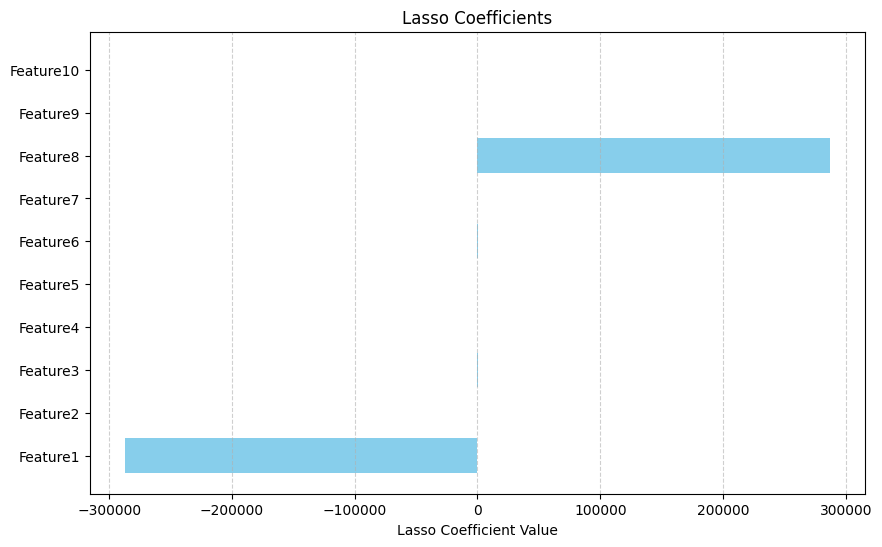

In [32]:
# Coeficientes obtenidos del modelo Lasso
lasso_coefficients = [-2.86959034e+05,  9.99999947e-01,  1.08937344e+01, -4.76809766e-04,
                      -2.54108884e+01,  2.11946874e+01, -6.38369780e+00,  2.86927943e+05,
                      4.91098499e+00,  1.93559968e-14]

# Nombres de las características
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5',
                 'Feature6', 'Feature7', 'Feature8', 'Feature9', 'Feature10']

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_names, lasso_coefficients, color='skyblue')
plt.xlabel('Lasso Coefficient Value')
plt.title('Lasso Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()


VAMOS A SELECCIONAR LAS CARACTERISTICAS DE ESOS VALORES ALTOS: Vamos a utilizar la clase SelectFromModel que permite seleccionar automáticamente las características más importantes a partir de los coeficientes de tu modelo Lasso.

In [39]:
# YA HEMOS HECHO NUESTO lasso_model.fit(X, y) enteriormente

# Crear un objeto SelectFromModel utilizando el modelo Lasso y un umbral
sfm = SelectFromModel(lasso_model, threshold=0.1)  # Ajusta el umbral según tus necesidades

# Ajustar el objeto SelectFromModel al conjunto de datos
sfm.fit(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[sfm.get_support()]

# Filtrar el conjunto de datos original con las características seleccionadas
X_selected = sfm.transform(X)

In [42]:
 #X_selected contiene solo las características seleccionadas
X_selected

array([[     0,  63000,      0, ...,      0,      0,      0],
       [     0,  95000,      0, ...,      0,      0,      1],
       [     0,  70000,      0, ...,      0,      0,      1],
       ...,
       [     0, 126000,      0, ...,      0,      0,      3],
       [     0,  42000,      2, ...,      3,      0,      1],
       [     0,  66310,      0, ...,      0,      0,      1]], dtype=int64)

VOLVEMOS A ENTRENAR NUESTRO MODELO CON LOS DATOS X_SELECTED

In [45]:
#DividO LOS datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#Entrena un nuevo modelo:
new_model = LinearRegression()
new_model.fit(X_train, y_train)

#Realiza predicciones y evalúa el rendimiento:

y_pred = new_model.predict(X_test)

# USO métricas de evaluación como es el error cuadrático medio (MSE)

mse = mean_squared_error(y_test, y_pred)
print(f'Nuevo modelo MSE: {mse}')


Nuevo modelo MSE: 3.4361164557012925e-19


In [47]:
y_pred

array([1.60000e+05, 9.00000e+05, 1.92000e+05, 9.00000e+04, 2.07000e+05,
       2.00000e+05, 1.45000e+05, 1.81940e+05, 8.99980e+04, 2.40000e+05,
       9.00000e+04, 7.40000e+04, 1.02000e+05, 1.60000e+05, 1.23000e+05,
       1.27000e+05, 5.04000e+05, 9.00000e+04, 1.74000e+03, 7.50000e+04,
       8.00000e+04, 1.30000e+05, 5.50000e+04, 8.80000e+04, 2.60000e+05,
       4.10000e+04, 1.20000e+05, 1.81000e+05, 2.60000e+05, 3.40000e+04,
       1.45000e+05, 7.20000e+04, 1.60000e+05, 8.80000e+04, 8.00000e+04,
       5.00000e+04, 1.80000e+05, 2.01000e+05, 1.00000e+05, 1.31300e+05,
       1.25000e+05, 1.80000e+05, 1.04000e+05, 1.62000e+05, 6.00000e+04,
       4.00000e+04, 1.80000e+05, 1.27000e+05, 2.16000e+05, 1.50000e+05,
       1.60000e+05, 1.40000e+05, 7.50000e+04, 2.00000e+05, 1.20000e+05,
       1.60000e+05, 9.90000e+04, 1.00000e+05, 5.50000e+04, 1.50000e+05,
       1.05000e+05, 4.00000e+04, 6.00000e+04, 1.23000e+05, 1.40000e+05,
       3.20000e+05, 3.00000e+04, 9.00000e+04, 2.40000e+05, 5.000

PINTAMOS GRAFICA PARA  visualizar resultados y comparar predicciones del nuevo modelo con los valores reales.

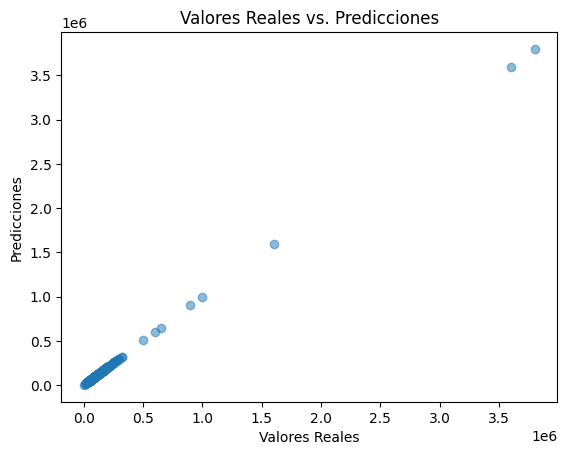

In [46]:
# Grafica de dispersión de los valores reales vs. predicciones
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Valores Reales vs. Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


Selección de Características:

Dado que Lasso tiende a reducir algunos coeficientes a cero, puedes analizar los coeficientes resultantes y seleccionar las características más importantes que tienen coeficientes no nulos. Estas son las características que el modelo considera más relevantes para hacer 

In [48]:
# Supongamos que `lasso_coefficients` es tu vector de coeficientes Lasso
non_zero_indices = np.where(lasso_coefficients != 0)[0]

# Usa estos índices para seleccionar las características correspondientes
selected_features = X.columns[non_zero_indices]

# `X` es tu conjunto de datos original
X_selected = X[selected_features]

C:\Users\victo\AppData\Local\Temp\ipykernel_19044\759178385.py:2: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  non_zero_indices = np.where(lasso_coefficients != 0)[0]


VOLVEMOS A ENTRENAR NUESTRO MODELO CON LOS DATOS X_SELECTED con metodo Regresión Elastic Net

Elastic Net MSE: 359034058134.96
Elastic Net Coefficients: [-3797.6482625]


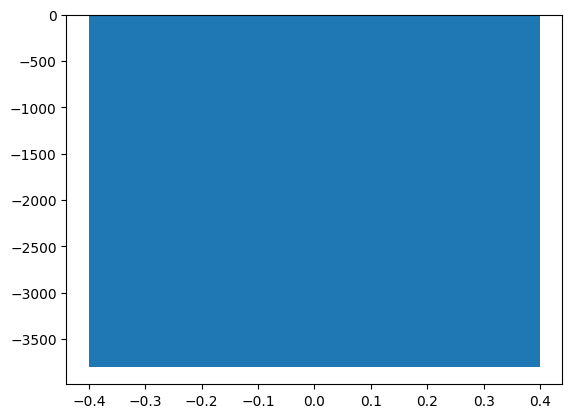

In [70]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Crear el modelo de Regresión Elastic Net
elastic_net = ElasticNet(alpha=10.0, l1_ratio=0.5)  # Puedes ajustar alpha y l1_ratio según sea necesario

# Entrenar el modelo
elastic_net.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = elastic_net.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Elastic Net MSE:", mse)

# Obtener los coeficientes resultantes
coefficients = elastic_net.coef_
print("Elastic Net Coefficients:", coefficients)

# Visualizar la importancia relativa de las características
plt.bar(range(len(coefficients)), coefficients)
plt.show()

Ajusta los Hiperparámetros: Experimenta con diferentes valores de alpha y l1_ratio para encontrar una combinación que funcione mejor para tus datos

In [67]:
alphas = [0.1, 1.0, 10.0]
l1_ratios = [0.1, 0.5, 0.9]

for alpha in alphas:
    for l1_ratio in l1_ratios:
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic_net.fit(X_train, y_train)
        y_pred = elastic_net.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"Alpha: {alpha}, L1 Ratio: {l1_ratio}, MSE: {mse}")


Alpha: 0.1, L1 Ratio: 0.1, MSE: 362122867487.7518
Alpha: 0.1, L1 Ratio: 0.5, MSE: 363270229775.23663
Alpha: 0.1, L1 Ratio: 0.9, MSE: 365702654859.0391
Alpha: 1.0, L1 Ratio: 0.1, MSE: 359438683771.1354
Alpha: 1.0, L1 Ratio: 0.5, MSE: 359795043693.8786
Alpha: 1.0, L1 Ratio: 0.9, MSE: 361924853352.38525
Alpha: 10.0, L1 Ratio: 0.1, MSE: 358992236485.7224
Alpha: 10.0, L1 Ratio: 0.5, MSE: 359034058134.96
Alpha: 10.0, L1 Ratio: 0.9, MSE: 359391382891.6672


Normalización de Datos: Asegúrate de que tus datos estén normalizados. Puedes usar StandardScaler de scikit-learn para esto

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Vamos a utilizar el modelo Gradient Boosting Regressor. Este modelo es conocido por su capacidad para manejar conjuntos de datos complejos y mejorar el rendimiento mediante la combinación de múltiples árboles de decisión.

Gradient Boosting MSE: 367936095736.53064


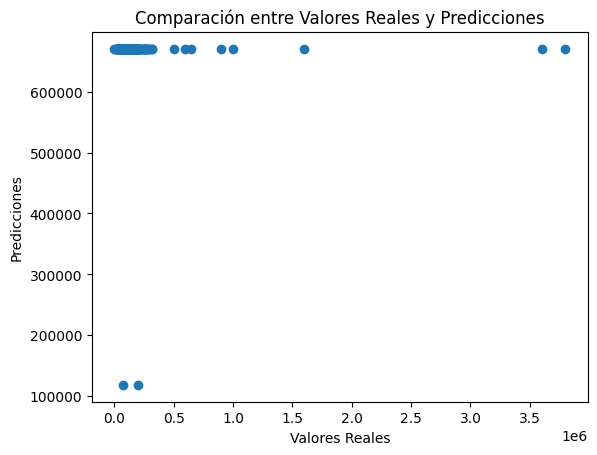

In [53]:
# Inicializa el modelo Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor()

# Ajusta el modelo a tus datos de entrenamiento
gradient_boosting.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = gradient_boosting.predict(X_test)

# Calcula el MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Gradient Boosting MSE: {mse}")

# Grafica los resultados reales frente a las predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre Valores Reales y Predicciones")
plt.show()

 Random Forest Regressor. : Un modelo de conjunto que utiliza múltiples árboles de decisión para hacer predicciones.

Random Forest MSE: 4815105712.427745


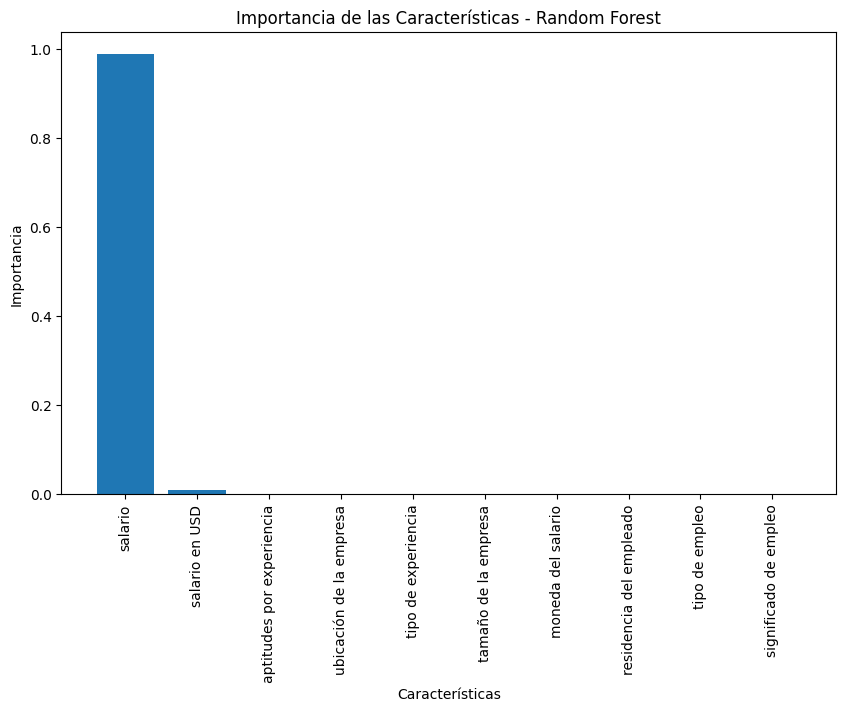

In [55]:
# Divide los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo de Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajusta el modelo al conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcula el MSE
rf_mse = mean_squared_error(y_test, y_pred)
print("Random Forest MSE:", rf_mse)

# Visualiza las características más importantes
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

features = X_train.columns

# Visualiza las características más importantes en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[sorted_indices], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las Características - Random Forest")
plt.show()

ajuste de hiperparámetros: Experimenta con diferentes valores de hiperparámetros del modelo Random Forest Regressor utilizando la búsqueda de cuadrícula o RandomizedSearchCV<br>

Características importantes: Examina la importancia de las características utilizando el atributo feature_importances_ del modelo entrenado. Puedes visualizar estas importancias para entender qué características están contribuyendo más a la predicción.

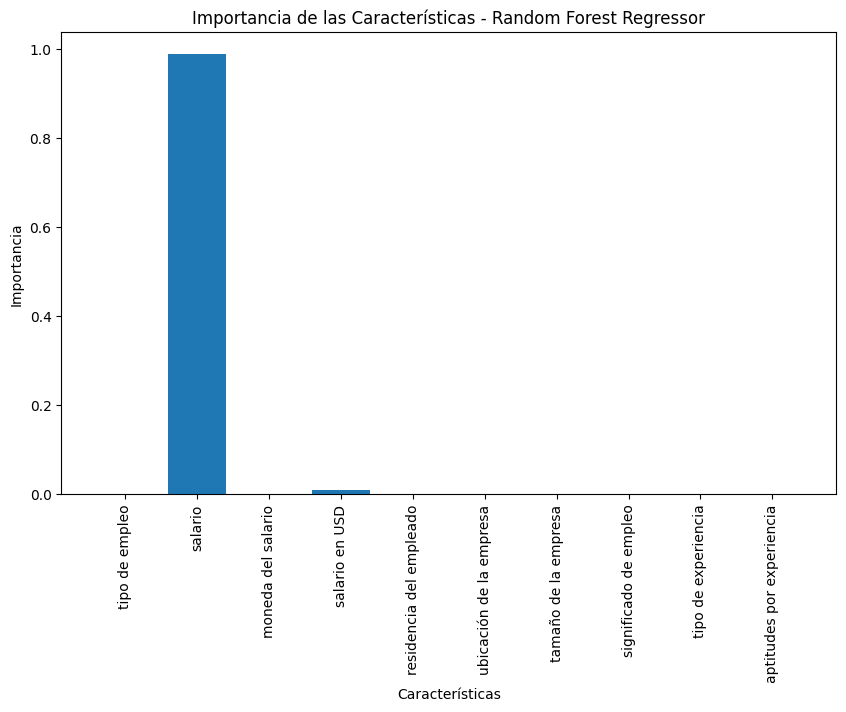

Random Forest MSE: 359034058134.96


In [73]:
# Suponiendo que rf es tu modelo Random Forest Regressor ya entrenado
feature_importances = rf_model.feature_importances_

# Visualiza las importancias de las características
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align="center")
plt.xticks(range(len(feature_importances)), np.array(features), rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las Características - Random Forest Regressor")
plt.show()

# Calcula el MSE
rf_mse = mean_squared_error(y_test, y_pred)
print("Random Forest MSE:", rf_mse)


cuadrícula (Grid Search) y RandomizedSearchCV son técnicas utilizadas para encontrar los mejores hiperparámetros para un modelo

In [92]:
# en cuadricula (Grid Search)

# Define el modelo
rf = RandomForestRegressor()

# Define la cuadrícula de parámetros que deseas explorar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realiza la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_selected, y)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtén el modelo con los mejores hiperparámetros
best_rf = grid_search.best_estimator_

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


#### con parametros ceramos uan nueva instancia a ver si el modelo se ajusta mas

In [93]:

# Crea una nueva instancia de RandomForestRegressor con los mejores hiperparámetros
best_rf_model = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100)

# Entrena el modelo con los datos de entrenamiento
best_rf_model.fit(X_selected, y)

# Realiza predicciones
predictions = best_rf_model.predict(X_selected)

predictions

array([560206.30006818, 560206.30006818, 560206.30006818, ...,
       560206.30006818, 560206.30006818, 560206.30006818])

In [79]:
# Define el modelo RandomizedSearchCV
rf = RandomForestRegressor()

# Define las distribuciones de probabilidad para la búsqueda aleatoria
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Realiza la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, scoring='neg_mean_squared_error', n_iter=10, cv=5)
random_search.fit(X_selected, y)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Obtén el modelo con los mejores hiperparámetros
best_rf_random = random_search.best_estimator_


Mejores hiperparámetros: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 80}


#### con parametros ceramos uan nueva instancia a ver si el modelo se ajusta mas

In [88]:
# Asegúrate de cargar el modelo entrenado con los mejores hiperparámetros
best_rf_model = RandomForestRegressor(n_estimators=80, max_depth=30, min_samples_split=3, min_samples_leaf=2, random_state=42)
best_rf_model.fit(X_train, y_train)

# Obtén la importancia de las características
feature_importances = best_rf_model.feature_importances_

In [89]:
feature_importances = best_rf_model.feature_importances_
print("Importancia de las Características:")
print(feature_importances)

Importancia de las Características:
[1.]


In [91]:
# Suponiendo que tienes datos de prueba X_test e y_test
predictions_test = best_rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print(f'MSE en datos de prueba: {mse_test}')

MSE en datos de prueba: 301214691707.5307
